In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from skimage import io
from tqdm.notebook import tqdm

In [2]:
transaction_train = pd.read_csv('./out.csv')

In [3]:
transaction_train.head()

,InvoiceDate,customer_id,article_id,price,sales_channel_id,t_dat,date,bought
0,2020-09-14,0008968c0d451dbc5a9968da03196fe20051965edde741...,893059004,0.035576,2,2020-09-14,2020-09-14,1
1,2020-09-03,002611889659ab1051fc3e4e870f2b603c3aaa902ffe6a...,902802002,0.033881,2,2020-09-03,2020-09-03,1
2,2020-09-03,002611889659ab1051fc3e4e870f2b603c3aaa902ffe6a...,805000007,0.050831,2,2020-09-03,2020-09-03,1
3,2020-09-03,002611889659ab1051fc3e4e870f2b603c3aaa902ffe6a...,918292001,0.042356,2,2020-09-03,2020-09-03,1
4,2020-09-03,002611889659ab1051fc3e4e870f2b603c3aaa902ffe6a...,805000001,0.050831,2,2020-09-03,2020-09-03,1


In [4]:
df=transaction_train

In [5]:
articles=pd.read_csv('./out_content.csv')

In [6]:
articles.head()

,article_id,product_group_name,index_group_name,garment_group_name
0,108775015,Garment Upper body,Ladieswear,Jersey Basic
1,108775044,Garment Upper body,Ladieswear,Jersey Basic
2,108775051,Garment Upper body,Ladieswear,Jersey Basic
3,110065001,Underwear,Ladieswear,"Under-, Nightwear"
4,110065002,Underwear,Ladieswear,"Under-, Nightwear"


In [7]:
df = df.merge(articles, on='article_id')

In [29]:
df.head()
df.tail()

,InvoiceDate,customer_id,article_id,price,sales_channel_id,t_dat,date,bought,product_group_name,index_group_name,garment_group_name
671669,2020-09-22,6afb3b5c6a12978ef2276b83cf4561ef54865f18f59d44...,875272002,0.050831,1,2020-09-22,2020-09-22,1,Garment Upper body,Divided,Trousers Denim
671670,2020-09-13,c89aaa8b1f2d75dddcde6da3940f9b73077b688ec26866...,875272002,0.045746,1,2020-09-13,2020-09-13,1,Garment Upper body,Divided,Trousers Denim
671671,2020-09-17,3f8f030a3befbb3a1f506cc3581c79382646677c7c86ab...,875272002,0.045746,1,2020-09-17,2020-09-17,1,Garment Upper body,Divided,Trousers Denim
671672,2020-09-19,93ab7f51c9defc350cbec5791c276a877d5b51b1295870...,875272002,0.050831,1,2020-09-19,2020-09-19,1,Garment Upper body,Divided,Trousers Denim
671673,2020-09-19,d6bfa4471ccf21c2c4f2f30037519e7c93a9750b5568a2...,875272002,0.050831,1,2020-09-19,2020-09-19,1,Garment Upper body,Divided,Trousers Denim


In [9]:
df.nunique().sort_values(ascending=True).to_frame().T

,bought,sales_channel_id,index_group_name,product_group_name,garment_group_name,InvoiceDate,t_dat,date,price,article_id,customer_id
0,1,2,5,12,21,22,22,22,4114,9225,184806


In [10]:
features = ['product_group_name', 'index_group_name', 'garment_group_name']

df2 = df[['customer_id', 'article_id'] + features]
dummies_df = pd.get_dummies(df2, columns=features)
dummies_df.head()

,customer_id,article_id,product_group_name_Accessories,product_group_name_Bags,product_group_name_Garment Full body,product_group_name_Garment Lower body,product_group_name_Garment Upper body,product_group_name_Items,product_group_name_Nightwear,product_group_name_Shoes,...,garment_group_name_Shorts,garment_group_name_Skirts,garment_group_name_Socks and Tights,garment_group_name_Special Offers,garment_group_name_Swimwear,garment_group_name_Trousers,garment_group_name_Trousers Denim,"garment_group_name_Under-, Nightwear",garment_group_name_Unknown,garment_group_name_Woven/Jersey/Knitted mix Baby
0,0008968c0d451dbc5a9968da03196fe20051965edde741...,893059004,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,00d83a52e9d41dd5360b982ed3b401be128d6eb139caed...,893059004,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0bdd8e553dfb0769e5220cfd179e6873f4d947760db32b...,893059004,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0e230c63a60133ec2c4cd5648c30c19d48313f5d45f0b9...,893059004,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3766c034b18c454d3db8b36b8605bb5828e8514a3818fa...,893059004,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
#최소 2개 이상의 제품을 구매한 고객들의 거래 내역을 필터링
minimum_items = 2
groupby_customer = dummies_df.groupby('customer_id')

l = []
cutomer_ids = []
article_ids = []
for key in groupby_customer.groups.keys():
    temp = groupby_customer.get_group(key) 
    if temp.article_id.nunique() >= minimum_items: #2개이상 구매한 고객만 필터링
        l.append(temp.drop('article_id', axis=1).sum(numeric_only=True).values)
        cutomer_ids.append(key)
        article_ids.extend(temp.article_id.values.tolist())

In [12]:
#customer matrix, 각 고객에게 제품의 다른 속성에 대한 weighted score을 부여
user_feature = pd.DataFrame(l, columns = dummies_df.columns[2:])
normalized_user_feature = user_feature.div(user_feature.sum(axis=1), axis=0)
normalized_user_feature.insert(0, 'customer_id', cutomer_ids)
normalized_user_feature = normalized_user_feature.set_index('customer_id')
normalized_user_feature

,product_group_name_Accessories,product_group_name_Bags,product_group_name_Garment Full body,product_group_name_Garment Lower body,product_group_name_Garment Upper body,product_group_name_Items,product_group_name_Nightwear,product_group_name_Shoes,product_group_name_Socks & Tights,product_group_name_Swimwear,...,garment_group_name_Shorts,garment_group_name_Skirts,garment_group_name_Socks and Tights,garment_group_name_Special Offers,garment_group_name_Swimwear,garment_group_name_Trousers,garment_group_name_Trousers Denim,"garment_group_name_Under-, Nightwear",garment_group_name_Unknown,garment_group_name_Woven/Jersey/Knitted mix Baby
customer_id,,,,,,,,,,,,,,,,,,,,,
0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a,0.000000,0.0,0.000000,0.333333,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.333333,0.000000,0.000000,0.000000,0.0
0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37e011580a479e80aa94,0.000000,0.0,0.000000,0.208333,0.125000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.083333,0.000000,0.000000,0.083333,0.0
0003e867a930d0d6842f923d6ba7c9b77aba33fe2a0fbf4672f30b3e622fec55,0.000000,0.0,0.095238,0.142857,0.095238,0.0,0.0,0.0,0.0,0.0,...,0.0,0.047619,0.0,0.0,0.0,0.095238,0.000000,0.000000,0.000000,0.0
00040239317e877c77ac6e79df42eb2633ad38fcac09fc0094e549180ddc201c,0.000000,0.0,0.000000,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.333333,0.000000,0.000000,0.0
000493dd9fc463df1acc2081450c9e75ef8e87d5dd17ed6396773839f6bf71a9,0.000000,0.0,0.000000,0.259259,0.074074,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.074074,0.185185,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffd0248a95c2e49fee876ff93598e2e20839e51b9b7678aab75d9e8f9f3c6c8,0.000000,0.0,0.000000,0.055556,0.055556,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.055556,0.000000,0.222222,0.000000,0.0
fffd870c6324ad3bda24e4d6aeae221c199479086bfdfd0eb40a3065971d0e01,0.000000,0.0,0.000000,0.166667,0.166667,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.166667,0.000000,0.000000,0.000000,0.0
fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20e02ce5d1e58a8f700b,0.000000,0.0,0.000000,0.100000,0.233333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.033333,0.033333,0.066667,0.000000,0.0


In [13]:
#item matrix
item_feature = dummies_df.drop_duplicates(subset='article_id')
item_feature = item_feature[item_feature.article_id.isin(article_ids)].drop('customer_id', axis=1)
item_feature = item_feature.set_index('article_id')
item_feature

,product_group_name_Accessories,product_group_name_Bags,product_group_name_Garment Full body,product_group_name_Garment Lower body,product_group_name_Garment Upper body,product_group_name_Items,product_group_name_Nightwear,product_group_name_Shoes,product_group_name_Socks & Tights,product_group_name_Swimwear,...,garment_group_name_Shorts,garment_group_name_Skirts,garment_group_name_Socks and Tights,garment_group_name_Special Offers,garment_group_name_Swimwear,garment_group_name_Trousers,garment_group_name_Trousers Denim,"garment_group_name_Under-, Nightwear",garment_group_name_Unknown,garment_group_name_Woven/Jersey/Knitted mix Baby
article_id,,,,,,,,,,,,,,,,,,,,,
893059004,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
902802002,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
805000007,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
918292001,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
805000001,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883068004,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
886226002,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
915225001,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
# dot product를 사용하여 최소 2개의 제품을 구매한 고객의 구매 기록을 기반으로 고객이 어떤 제품을 좋아할지를 나타내는 점수를 얻음
scores = normalized_user_feature.dot(item_feature.T)
scores

article_id,893059004,902802002,805000007,918292001,805000001,730683050,910824001,864295001,743790004,903813001,...,832361002,684062020,795675005,800245011,825600001,883068004,886226002,915225001,808569002,875272002
customer_id,,,,,,,,,,,,,,,,,,,,,
0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a,0.0,0.0,0.0,0.333333,0.0,0.0,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.333333,0.0,0.0,0.666667,0.333333,0.333333,0.0,0.333333
0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37e011580a479e80aa94,0.291667,0.291667,0.291667,0.375,0.291667,0.166667,0.375,0.125,0.0,0.0,...,0.416667,0.166667,0.291667,0.166667,0.291667,0.333333,0.125,0.125,0.291667,0.25
0003e867a930d0d6842f923d6ba7c9b77aba33fe2a0fbf4672f30b3e622fec55,0.142857,0.142857,0.142857,0.190476,0.142857,0.047619,0.190476,0.142857,0.095238,0.095238,...,0.142857,0.0,0.428571,0.0,0.142857,0.47619,0.52381,0.52381,0.142857,0.428571
00040239317e877c77ac6e79df42eb2633ad38fcac09fc0094e549180ddc201c,0.333333,0.333333,0.333333,0.0,0.333333,0.0,0.0,0.333333,0.0,0.0,...,0.333333,0.0,0.666667,0.0,0.0,0.333333,0.333333,0.333333,0.333333,1.0
000493dd9fc463df1acc2081450c9e75ef8e87d5dd17ed6396773839f6bf71a9,0.074074,0.148148,0.148148,0.333333,0.148148,0.074074,0.333333,0.074074,0.0,0.0,...,0.148148,0.0,0.407407,0.0,0.074074,0.592593,0.333333,0.333333,0.148148,0.592593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffd0248a95c2e49fee876ff93598e2e20839e51b9b7678aab75d9e8f9f3c6c8,0.444444,0.055556,0.055556,0.055556,0.055556,0.0,0.055556,0.111111,0.0,0.0,...,0.388889,0.333333,0.055556,0.777778,0.333333,0.055556,0.0,0.0,0.055556,0.055556
fffd870c6324ad3bda24e4d6aeae221c199479086bfdfd0eb40a3065971d0e01,0.5,0.333333,0.333333,0.333333,0.333333,0.166667,0.333333,0.166667,0.0,0.0,...,0.666667,0.333333,0.166667,0.333333,0.5,0.166667,0.0,0.0,0.333333,0.166667
fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20e02ce5d1e58a8f700b,0.666667,0.233333,0.233333,0.1,0.233333,0.0,0.1,0.366667,0.0,0.0,...,0.533333,0.3,0.3,0.366667,0.3,0.133333,0.033333,0.033333,0.233333,0.3


In [15]:
#고객이 이미 구매한 제품은 추천에서 제외
def get_recommendation(customer_id):
    cutomer_scores = scores.loc[customer_id]
    customer_prev_items = groupby_customer.get_group(customer_id)['article_id']
    prev_dropped = cutomer_scores.drop(customer_prev_items.values)
    ordered = prev_dropped.sort_values(ascending=False)   
    return ordered, customer_prev_items

In [102]:
k = 12 # 추천할 제품의 수
customer_id = scores.index[94] # 고객 ID


rcmnds, prev_items = get_recommendation(customer_id)
rcmnds_img = rcmnds.index.values[:k]

path = "./h-and-m-personalized-fashion-recommendations/images"

In [103]:
#추천된 제품 스코어 
rcmnds_df = pd.DataFrame(rcmnds[:k])
rcmnds_df.rename(columns={ rcmnds_df.columns[0]: "Scores" }, inplace = True)
rcmnds_df


,Scores
article_id,
911813001,0.733333
909888001,0.733333
893454001,0.733333
826508006,0.733333
828934002,0.733333
909529001,0.733333
907563001,0.733333
828938001,0.733333
895002002,0.733333


In [104]:
previous_item_df = pd.DataFrame(prev_items).reset_index(drop=True)
previous_item_df

,article_id
0,919499007
1,924645001
2,891591002
3,896161001
4,906639003


In [105]:
# 구매 기록 제품 ID를 관련 이미지에 매핑하고 제품을 표시하는 함수
def plot_purchase_history():
    fig = plt.figure(figsize=(20, 10))
    for item, i in zip(prev_items, range(1, len(prev_items)+1)):
        item = '0' + str(item)
        sub = item[:3]
        image = path + "/"+ sub + "/"+ item +".jpg"
        image = plt.imread(image)
        fig.add_subplot(1, len(prev_items), i)
        plt.imshow(image)

In [106]:
# 추천된 제품 ID를 관련 이미지에 매핑하고 제품을 표시하는 함수
def plot_recommendation():
    #print(rcmnds)
    fig = plt.figure(figsize=(20, 10))
    for item, i in zip(rcmnds_img, range(1, k+1)):
        item = '0' + str(item)
        sub = item[:3]
        image = path + "/"+ sub + "/"+ item +".jpg"
        image = plt.imread(image)
        fig.add_subplot(1, len(rcmnds_img), i)
        plt.imshow(image)

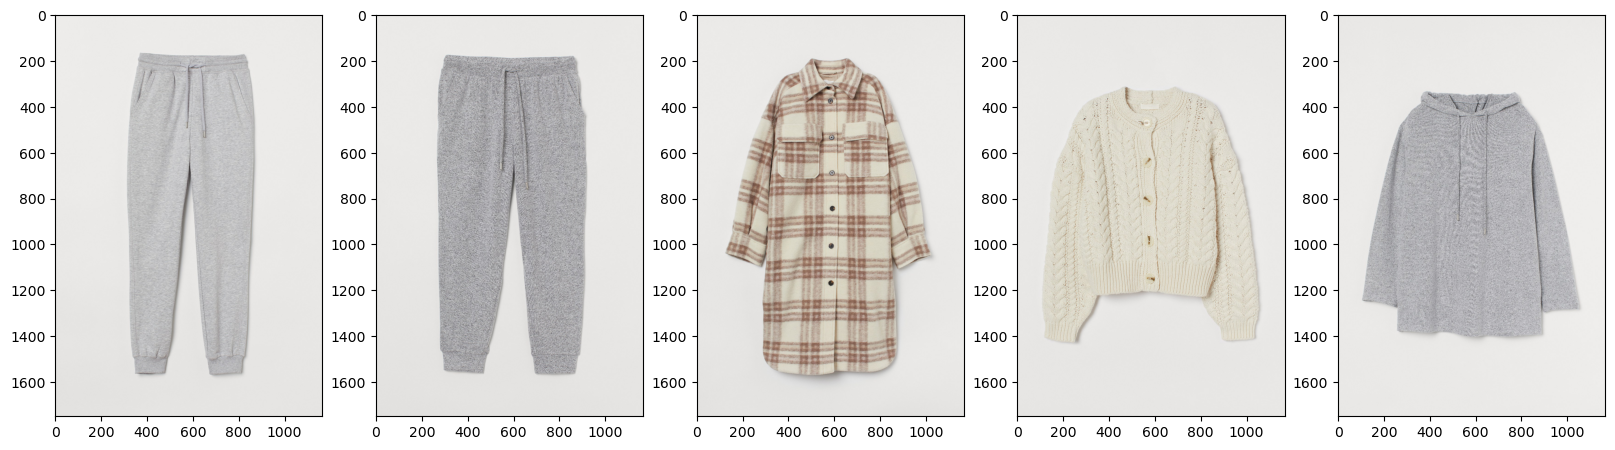

In [107]:
plot_purchase_history()

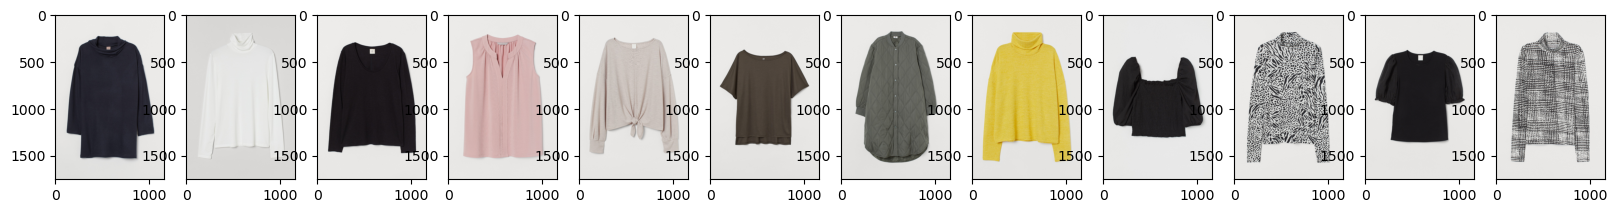

In [108]:
plot_recommendation()